<a href="https://colab.research.google.com/github/ZahibVentura/Simulaci-n-2-/blob/main/Muestreo_importancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

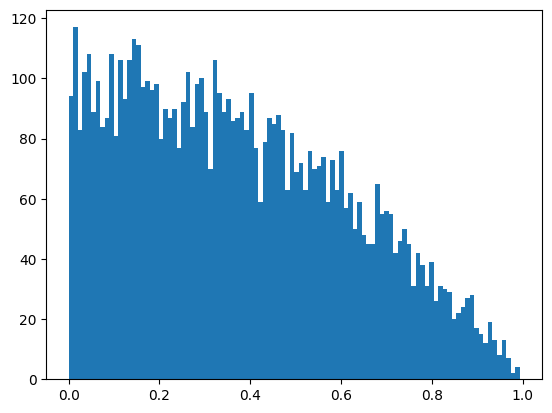

In [21]:
import random as rd
import matplotlib.pyplot as plt   #importamos todas las librerias a utilizar
import numpy as np
import math as mt
from prettytable import PrettyTable


#La funcion siempre es positiva para todo X en el intervalo [0,1]
#se aplica el método de la aceptación y rechazo para su simulación
#tomando a c = 1.5 y g(x)= 1 probó que la integral total da como resultado 1


#El siguiente código muestra la simulación de la variable aleatoria que sigue dicha distribucion
#Método de aceptación y rechazo

def funcion(N=50): #Definimos una función que regresa una lista de valores x
  Lis = []
  for i in range(N):
    u = rd.uniform(0,1) #variable uniforme de 0 a 1
    y = rd.uniform(0,1) #variable uniforme de 0 a 1
    g = 3*(1 - y**2)/2

    if u <= g/1.5 : #condicion para regresar x
      x = y
      Lis.append(x)
  return Lis # se regresa la lista
n = 10000

F = funcion(n) #se manda a llamar a la función con 100000 iteraciones

plt.hist(F,bins = 100)   #mostramos el histograma
plt.show()

In [22]:
#METODO DE MONTECARLO POR MUESTREO-IMPORTANCIA

Lista1 = []  #Definimos una lista para guardar los valores de la integral
sumita = 0
T = funcion(n)  #se manda a llamar a la función de mi variable aleatoria simulada con 10000 iteraciones
for j in range(len(T)):
  f = np.cos((np.pi*T[j])/2)  #se calcula la funcion cos(x.pi/2)
  G = 3*(1-T[j]**2)/2  #se calcula la funcion g(x)
  Cociente = f / G   #Sacamos el coeficiente de f(x) sobre g(x)
  sumita += Cociente
  prom = sumita / (j+1)  #Sacamos el promedio de los cocientes por cada iteracion
  Lista1.append(prom)  #Agregamos el promedio a la lista


print("El valor de la integral es: ",Lista1[-1])  #Imprimimos el ultimo valor de la lista

El valor de la integral es:  0.6364165911100595


Media: 0.6368441277546861
Desviación estándar: 0.0010935244751487771
Varianza: 1.1957957777494085e-06


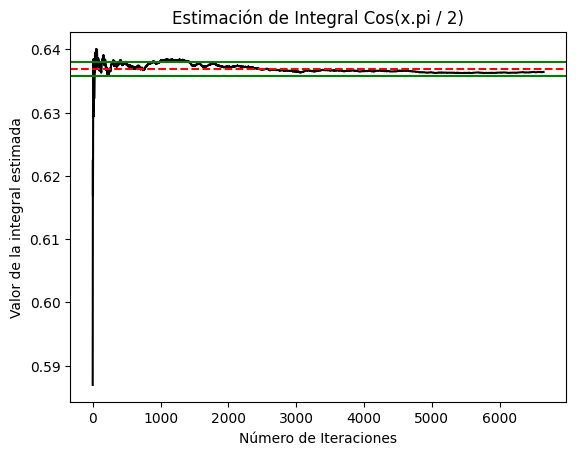

In [24]:
# Graficar la estimación de la integral cos(x.pi / 2)
plt.plot(Lista1,color='k')

# Cálculo de la media, varianza y desviación estándar
media1 = np.mean(Lista1)
desviacion_estandar1 = np.std(Lista1)
varianza1 = np.var(Lista1)

# Imprimir los resultados
print("Media:", media1)
print("Desviación estándar:", desviacion_estandar1)
print("Varianza:", varianza1)

# Graficar la media y desviacion
plt.axhline(y=media1, color='r', linestyle='--', label=f'Media1 = {media1:.4f}')
plt.axhline((desviacion_estandar1 + media1), color='g')  # Límite superior del intervalo
plt.axhline((-desviacion_estandar1 + media1), color='g')  # Límite inferior del intervalo



# Agregar etiquetas y leyenda
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor de la integral estimada')
plt.title('Estimación de Integral Cos(x.pi / 2)')

plt.show()

### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [25]:
#Intervalo de confianza con un nivel se significancia del 5% y n = 50

import scipy.stats

limite_inferior = media1 + scipy.stats.norm.ppf(0.025)*desviacion_estandar1/np.sqrt(50)
limite_superior = media1 - scipy.stats.norm.ppf(0.025)*desviacion_estandar1/np.sqrt(50)
print("Intervalo de confianza: [ ",limite_inferior,limite_superior," ]")

Intervalo de confianza: [  0.6365410238042604 0.6371472317051119  ]


El valor de la integral es:  0.6418742679225256
Media: 0.6447583244315368
Desviación estándar: 0.008429320123380801
Varianza: 7.105343774243251e-05


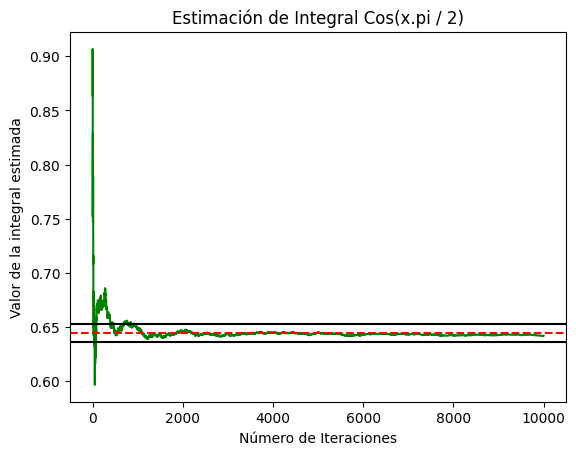

In [26]:
#MONTE CARLO CRUDO



suma = 0
Lista = []  #definimos una lista vacia

#iniciamos nuestro ciclo
for i in range(n):
  x = rd.uniform(0,1) #generamos un numero aleatorio "limites de la integral"
  #evaluamos nuestro numero en la funcion de la integral
  f_x = mt.cos((mt.pi*x)/2)
  suma = suma + f_x
  promedio = suma/(i+1)  #aplicando Monte Carlo
  Lista.append(promedio)

#imprimimos el valor de la integral
print("El valor de la integral es: ",Lista[-1])

# Graficar la estimación de la integral cos(x.pi / 2)
plt.plot(Lista,color='g')

# Cálculo de la media, varianza y desviación estándar
media2 = np.mean(Lista)
desviacion_estandar2 = np.std(Lista)
varianza2 = np.var(Lista)



# Imprimir los resultados
print("Media:", media2)
print("Desviación estándar:", desviacion_estandar2)
print("Varianza:", varianza2)

# Graficar la media y desviacion
plt.axhline(y=media2, color='r', linestyle='--', label=f'Media = {media2:.4f}')
plt.axhline((desviacion_estandar2 + media2), color='k')  # Límite superior del intervalo
plt.axhline((-desviacion_estandar2 + media2), color='k')  # Límite inferior del intervalo



# Agregar etiquetas y leyenda
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor de la integral estimada')
plt.title('Estimación de Integral Cos(x.pi / 2)')

plt.show()

### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [27]:
#Intervalo de confianza con un nivel se significancia del 5% y n = 50



limite_inferior = media2 + scipy.stats.norm.ppf(0.025)*desviacion_estandar2/np.sqrt(50)
limite_superior = media2 - scipy.stats.norm.ppf(0.025)*desviacion_estandar2/np.sqrt(50)
print("Intervalo de confianza: [ ",limite_inferior,limite_superior," ]")

Intervalo de confianza: [  0.6424218790324046 0.647094769830669  ]


In [28]:
#MONTE CARLO POR ACIERTO Y ERROR


LISTA = []  #definimos una lista vacia
S = 0 #contador

for i in range(n):
  x = rd.uniform(0,1)    #definimos 2 numeros aleatorios
  y = rd.uniform(0,1)
  F = mt.cos((mt.pi*x)/2)  #evaluamos uno de ellos en la funcion original
  if y <= F:   #Comparamos el otro numero con el resultado de la funcion original
    S += 1
  Promedio1 = S/(i+1)   #promediamos
  LISTA.append(Promedio1)
print("El valor de la integral es: ",LISTA[-1])  #Devolvemos el ultimo valor de la lista el cual va a ser nuestro estimador

El valor de la integral es:  0.6388


Media: 0.6403324113634886
Desviación estándar: 0.008801996332016202
Varianza: 7.747513942882668e-05


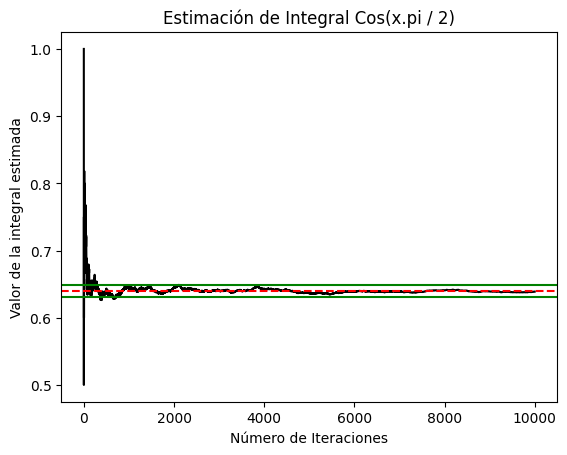

In [29]:
# Graficar la estimación de la integral cos(x.pi / 2)
plt.plot(LISTA,color='k')

# Cálculo de la media, varianza y  desviación estándar
media3 = np.mean(LISTA)
desviacion_estandar3 = np.std(LISTA)
varianza3 = np.var(LISTA)

# Imprimir los resultados
print("Media:", media3)
print("Desviación estándar:", desviacion_estandar3)
print("Varianza:", varianza3)

# Graficar la media y desviacion
plt.axhline(y=media3, color='r', linestyle='--', label=f'Media = {media3:.4f}')
plt.axhline((desviacion_estandar3 + media3), color='g')  # Límite superior del intervalo
plt.axhline((-desviacion_estandar3 + media3), color='g')  # Límite inferior del intervalo



# Agregar etiquetas y leyenda
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor de la integral estimada')
plt.title('Estimación de Integral Cos(x.pi / 2)')

plt.show()

### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [30]:
#Intervalo de confianza con un nivel se significancia del 5% y n = 100


limite_inferior = media3 + scipy.stats.norm.ppf(0.025)*desviacion_estandar3/np.sqrt(50)
limite_superior = media3- scipy.stats.norm.ppf(0.025)*desviacion_estandar3/np.sqrt(50)
print("Intervalo de confianza: [ ",limite_inferior,limite_superior," ]")

Intervalo de confianza: [  0.637892667287798 0.6427721554391792  ]


In [31]:
L1 = ['CRUDO',n,Lista[-1],media2,varianza2,desviacion_estandar2]
L2 = ['ACIERTO_Y_ERROR',n,LISTA[-1],media3,varianza3,desviacion_estandar3]
L3 = ['MUESTREO_IMPORTANCIA',n,Lista1[-1],media1,varianza1,desviacion_estandar1]
Tabla = PrettyTable(['MONTE_CARLO','n','INTEGRAL_ESTIMADA','MEDIA','VARIANZA','DESVIACION_ESTANDAR'])
Tabla.add_row(L1)
Tabla.add_row(L2)
Tabla.add_row(L3)

print(Tabla)

+----------------------+-------+--------------------+--------------------+------------------------+-----------------------+
|     MONTE_CARLO      |   n   | INTEGRAL_ESTIMADA  |       MEDIA        |        VARIANZA        |  DESVIACION_ESTANDAR  |
+----------------------+-------+--------------------+--------------------+------------------------+-----------------------+
|        CRUDO         | 10000 | 0.6418742679225256 | 0.6447583244315368 | 7.105343774243251e-05  |  0.008429320123380801 |
|   ACIERTO_Y_ERROR    | 10000 |       0.6388       | 0.6403324113634886 | 7.747513942882668e-05  |  0.008801996332016202 |
| MUESTREO_IMPORTANCIA | 10000 | 0.6364165911100595 | 0.6368441277546861 | 1.1957957777494085e-06 | 0.0010935244751487771 |
+----------------------+-------+--------------------+--------------------+------------------------+-----------------------+


In [ ]:
Lista_Var = [varianza1,varianza2,varianza3]
def metodo(a,b):
  return a/b
for j in Lista_Var:
  met = metodo(j,j+1)
  if (met<1):
    print("MC-importancia es mejor que MC-Crudo")